In [674]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [675]:
cwd = os.getcwd()
data_file_name = "/dataset/day.csv"
dataset = pd.read_csv(cwd + data_file_name)
dataset.shape #(731, 16)

(731, 16)

In [676]:
dataset[710:]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
710,711,2012-12-11,4,1,12,0,2,1,2,0.353333,0.338363,0.596667,0.296037,282,5219,5501
711,712,2012-12-12,4,1,12,0,3,1,2,0.297500,0.297338,0.538333,0.162937,310,5009,5319
712,713,2012-12-13,4,1,12,0,4,1,1,0.295833,0.294188,0.485833,0.174129,425,5107,5532
713,714,2012-12-14,4,1,12,0,5,1,1,0.281667,0.294192,0.642917,0.131229,429,5182,5611
714,715,2012-12-15,4,1,12,0,6,0,1,0.324167,0.338383,0.650417,0.106350,767,4280,5047
715,716,2012-12-16,4,1,12,0,0,0,2,0.362500,0.369938,0.838750,0.100742,538,3248,3786
716,717,2012-12-17,4,1,12,0,1,1,2,0.393333,0.401500,0.907083,0.098258,212,4373,4585
717,718,2012-12-18,4,1,12,0,2,1,1,0.410833,0.409708,0.666250,0.221404,433,5124,5557
718,719,2012-12-19,4,1,12,0,3,1,1,0.332500,0.342162,0.625417,0.184092,333,4934,5267
719,720,2012-12-20,4,1,12,0,4,1,2,0.330000,0.335217,0.667917,0.132463,314,3814,4128


In [677]:
# convert string to datetime
dataset.dteday = dataset.dteday.apply(lambda x:pd.to_datetime(x))
dataset = dataset.drop(['instant'], axis = 1)
dataset = dataset.rename(columns={'registered': 'regist'})
dataset[dataset.dteday == '2012-10-29'].index
dataset = dataset.drop(dataset[dataset.dteday == '2012-10-29'].index)


In [862]:
# calculate the ahead n-7 to n-2 days average number
def calcAvgShift(dfCol, period, exclude):
    try:
        summary = dfCol.rolling(period).mean()
        if period is None:
            return dfCol
        if exclude is None:
            return summary
        mean = dfCol.shift(exclude).rolling(period, 1).mean()
        return mean.apply(lambda x: round(x, 3))
    except Exception as e:
        print("error:" + str(e))
        
def calcMaxShift(dfCol, period, exclude):
    try:
        summary = dfCol.rolling(period).max()
        if period is None:
            return dfCol
        if exclude is None:
            return summary
        maximum = dfCol.shift(exclude).rolling(period, 1).max()
        return maximun.apply(lambda x: round(x, 3))
    except Exception as e:
        print("error:" + str(e))
        
def calcMinShift(dfCol, period, exclude):
    try:
        summary = dfCol.rolling(period).min()
        if period is None:
            return dfCol
        if exclude is None:
            return summary
        minimum = dfCol.shift(exclude).rolling(period, 1).min()
        return maximun.apply(lambda x: round(x, 3))
    except Exception as e:
        print("error:" + str(e))

In [679]:
def calcIncreaseRatio(pre, comp):
    inc = (comp - pre) / pre
    return round(inc, 3)

In [680]:
dataset['casual_lag2'] = dataset['casual'].shift(2)
dataset['regist_lag2'] = dataset['regist'].shift(2)
dataset['cnt_lag2'] = dataset['cnt'].shift(2)

dataset['temp_inc'] = calcIncreaseRatio(dataset.temp.shift(1), dataset.temp)
# dataset['temp_lag2'] = dataset.temp.shift(2)
# dataset['temp_inc2day'] = calcIncreaseRatio(dataset.temp.shift(2), dataset.temp.shift(1))
# dataset['hum_inc2day'] = calcIncreaseRatio(dataset.hum.shift(2), dataset.hum.shift(1))


CASUAL_AVG = 'casual_avg_aheadWeek'

dataset['casual_avg_aheadWeek'] = calcAvgShift(dataset.casual, 7, 2)
dataset['regist_avg_aheadWeek'] = calcAvgShift(dataset.regist, 7, 2)
dataset['cnt_avg_aheadWeek'] = calcAvgShift(dataset.cnt, 7, 2)

dataset['casual_avg_ahead3days'] = calcAvgShift(dataset.casual, 5, 2)
dataset['regist_avg_ahead3days'] = calcAvgShift(dataset.regist, 5, 2)
dataset['cnt_avg_ahead3days'] = calcAvgShift(dataset.cnt, 5, 2)

dataset['casual_avg_aheadMonth'] = calcAvgShift(dataset.casual, 31, 2)
dataset['regist_avg_aheadMonth'] = calcAvgShift(dataset.regist, 31, 2)
dataset['cnt_avg_aheadMonth'] = calcAvgShift(dataset.cnt, 31, 2)

dataset['casual_median_LastWeek'] = dataset.casual.shift(2).rolling(7, 1).median()
dataset['regist_median_LastWeek'] = dataset.regist.shift(2).rolling(7, 1).median()
dataset['cnt_median_LastWeek'] = dataset.cnt.shift(2).rolling(7, 1).median()


dataset['casual_inc_ratio_lag2'] = calcIncreaseRatio(dataset.casual.shift(3), dataset.casual.shift(2)) 
dataset['regist_inc_ratio_lag2'] = calcIncreaseRatio(dataset.regist.shift(3), dataset.regist.shift(2)) 
dataset['cnt_inc_ratio_lag2'] = calcIncreaseRatio(dataset.cnt.shift(3), dataset.cnt.shift(2))

dataset['casual_inc_ratio_max_lastweek'] = calcIncreaseRatio(calcMaxShift(dataset.casual, 10))

# dataset['casual_max_LastWeek'] = dataset.casual.shift(2).rolling(7, 1).max()
# dataset['regist_max_LastWeek'] = dataset.regist.shift(2).rolling(7, 1).max()
# dataset['cnt_max_LastWeek'] = dataset.cnt.shift(2).rolling(7, 1).max()

dataset['casual_inc_ratio_monthly'] = calcIncreaseRatio(calcAvgShift(dataset.casual, 31, 2), dataset.casual_lag2)
dataset['regist_inc_ratio_monthly'] = calcIncreaseRatio(calcAvgShift(dataset.regist, 31, 2), dataset.regist_lag2)
dataset['cnt_inc_ratio_monthly'] = calcIncreaseRatio(calcAvgShift(dataset.cnt, 31, 2), dataset.cnt_lag2)

dataset['casual_inc_ratio_weekly'] = calcIncreaseRatio(calcAvgShift(dataset.casual, 7, 2), dataset.casual_lag2)
dataset['regist_inc_ratio_weekly'] = calcIncreaseRatio(calcAvgShift(dataset.regist, 7, 2), dataset.regist_lag2)
dataset['cnt_inc_ratio_weekly'] = calcIncreaseRatio(calcAvgShift(dataset.cnt, 7, 2), dataset.cnt_lag2)

# dataset['casual_lastWeekday'] = dataset.casual.shift(7)
# dataset['regist_lastWeekday'] = dataset.regist.shift(7)
# dataset['cnt_lastWeekday'] = dataset.cnt.shift(7)

dataset['casual_inc_ratio'] = ((dataset['casual'] - dataset['casual_lag2']) / dataset['casual_lag2']).apply(lambda x:round(x, 3))
dataset['regist_inc_ratio'] = ((dataset['regist'] - dataset['regist_lag2']) / dataset['regist_lag2']).apply(lambda x:round(x, 3))
dataset['cnt_inc_ratio'] = ((dataset['cnt'] - dataset['cnt_lag2']) / dataset['cnt_lag2']).apply(lambda x:round(x, 3))

dataset.to_csv("./totalBikeSharing.csv", index=False)




In [681]:
# one hot encode dummy encode
dummy_season = pd.get_dummies(dataset.season, prefix="season")
dummy_weathersit = pd.get_dummies(dataset.weathersit, prefix="weathersit")
# dummy_weekday = pd.get_dummies(dataset.weekday, prefix="weekday")
dataset = pd.concat([dataset, dummy_season, dummy_weathersit], axis = 1)

In [682]:
# drop columns and mark some columns
casual_cols = dataset.filter(like = 'casual').columns.values.tolist() # filter the column name contain casual
regist_cols = dataset.filter(like = 'regist').columns.values.tolist()
cnt_cols = dataset.filter(like = 'cnt').columns.values.tolist()

oneHotCols = dataset.filter(regex='workingday|holiday|weekday|weathersit_|season_').columns.values
exclude_dict = {'casual': regist_cols + cnt_cols, 'regist': casual_cols + cnt_cols, 'cnt': casual_cols + regist_cols}


In [683]:
train_X.head()

,holiday,workingday,temp,hum,cnt_lag2,temp_inc,cnt_avg_aheadWeek,cnt_avg_ahead3days,cnt_avg_aheadMonth,cnt_median_LastWeek,cnt_max_LastWeek,cnt_inc_ratio_monthly,cnt_inc_ratio_weekly,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
7,0,0,-1.736536,-0.735774,-1.343224,-1.033120,-1.749510,-1.667095,-1.699775,-1.675329,-1.928089,0.725079,0.971262,1,0,0,0,0,1,0
8,0,0,-1.878437,-1.420220,-1.413556,-1.044854,-1.726764,-1.551932,-1.677145,-1.631611,-1.928089,0.351372,0.535959,1,0,0,0,1,0,0
9,0,1,-1.811922,-1.092021,-1.817231,0.433612,-1.729831,-1.615280,-1.716752,-1.631611,-1.928089,-1.139562,-1.314078,1,0,0,0,1,0,0
10,0,1,-1.714767,0.277646,-1.917600,0.615487,-1.727354,-1.735478,-1.760063,-1.631611,-1.928089,-1.447092,-1.781121,1,0,0,0,0,1,0
11,0,1,-1.695420,-0.306846,-1.552022,0.034661,-1.730656,-1.780796,-1.753720,-1.631611,-1.928089,0.090556,-0.085254,1,0,0,0,1,0,0


In [684]:
# split train and test
target = 'cnt'
target_col_name = target + '_inc_ratio'

train = dataset[dataset.dteday < datetime(2012, 1, 1)]
test = dataset[dataset.dteday > datetime(2011, 12, 31)]

train_Y_origin = train[target]
test_Y_origin = test[target]

train_Y = train[target_col_name]
test_Y = test[target_col_name]

drop_col = ['dteday', 'yr', 'mnth', 'weekday', \
            'season', 'weathersit', 'cnt', 'atemp', 'windspeed',
           ]
drop_col.extend([target_col_name, target])

drop_col.extend(list(exclude_dict[target]))

train_X = train.drop(drop_col, axis = 1)
test_X = test.drop(drop_col, axis = 1)
standCols = [i for i in train_X.columns.values if i not in oneHotCols]
standCols

['temp',
 'hum',
 'cnt_lag2',
 'temp_inc',
 'cnt_avg_aheadWeek',
 'cnt_avg_ahead3days',
 'cnt_avg_aheadMonth',
 'cnt_median_LastWeek',
 'cnt_inc_ratio_monthly',
 'cnt_inc_ratio_weekly']

In [685]:
train_X = train_X[7:] # remove the begining 7 NaN
train_Y = train_Y[7:]



In [686]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_X[standCols])
train_X.loc[:, standCols] = scaler.transform(train_X[standCols])
test_X.loc[:, standCols] = scaler.transform(test_X[standCols])

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False])

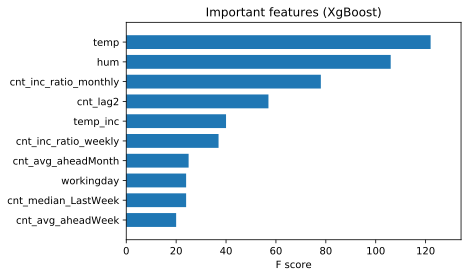

In [687]:

from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance, plot_tree, to_graphviz

regr = XGBRegressor()
regr.fit(train_X, train_Y)

regr.feature_importances_
plot_importance(regr, max_num_features=10,  height=0.7,
                    title = 'Important features (XgBoost)',
                   grid = False, ylabel="", show_values=False)
regr.feature_importances_ > 0.03

In [688]:
# selected_features = list(train_X.columns[regr.feature_importances_ > 0.03])
# train_X = train_X[selected_features]
# train_X
# test_X = test_X[selected_features]

In [818]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dropout
from keras import regularizers

EPOCHS = 20
BATCH_SIZE = 3


model = Sequential()
model.add(Dense(train_X.shape[1], input_dim = train_X.shape[1], 
                kernel_initializer='random_uniform', 
                bias_initializer='ones',
                activation='relu'))
model.add(Dropout(0.25))
# model.add(Dense(train_X.shape[1], kernel_initializer='random_uniform',
#                 bias_initializer='ones',
#                 activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(9, kernel_initializer='random_uniform',
                bias_initializer='ones',
                activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(train_X, train_Y, epochs=EPOCHS, validation_data=(test_X, test_Y), batch_size=BATCH_SIZE, verbose=2)
train_Y_prediction = model.predict(train_X)
test_Y_prediction = model.predict(test_X)
model.summary()
nnModel = model




Train on 358 samples, validate on 365 samples
Epoch 1/20
 - 1s - loss: 0.3344 - val_loss: 0.3017
Epoch 2/20
 - 1s - loss: 0.3133 - val_loss: 0.2807
Epoch 3/20
 - 0s - loss: 0.2585 - val_loss: 0.2278
Epoch 4/20
 - 0s - loss: 0.2040 - val_loss: 0.2036
Epoch 5/20
 - 0s - loss: 0.1752 - val_loss: 0.1799
Epoch 6/20
 - 0s - loss: 0.1554 - val_loss: 0.1713
Epoch 7/20
 - 0s - loss: 0.1445 - val_loss: 0.1489
Epoch 8/20
 - 0s - loss: 0.1425 - val_loss: 0.1588
Epoch 9/20
 - 0s - loss: 0.1207 - val_loss: 0.1475
Epoch 10/20
 - 0s - loss: 0.1068 - val_loss: 0.1382
Epoch 11/20
 - 0s - loss: 0.1048 - val_loss: 0.1237
Epoch 12/20
 - 0s - loss: 0.1022 - val_loss: 0.1263
Epoch 13/20
 - 0s - loss: 0.1029 - val_loss: 0.1262
Epoch 14/20
 - 0s - loss: 0.0825 - val_loss: 0.1263
Epoch 15/20
 - 0s - loss: 0.0876 - val_loss: 0.1115
Epoch 16/20
 - 0s - loss: 0.0849 - val_loss: 0.1278
Epoch 17/20
 - 1s - loss: 0.0866 - val_loss: 0.1363
Epoch 18/20
 - 1s - loss: 0.0935 - val_loss: 0.1151
Epoch 19/20
 - 1s - loss: 0

In [819]:
lagColumnName = target + '_lag2'
predRationColumnName = target + '_pred_ratio'
predValueColumnName = target + '_pred_value'
test[predRationColumnName] = test_Y_prediction.flatten()
test[predValueColumnName] = test[lagColumnName] * ( 1 + test[predRationColumnName])


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


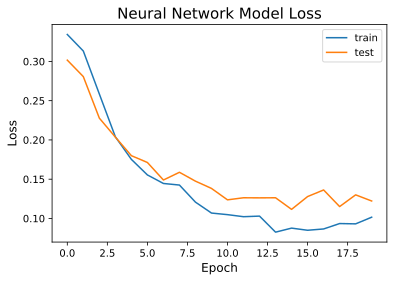

In [820]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Neural Network Model Loss', fontsize = 15)
plt.ylabel('Loss', fontsize = 12)
plt.xlabel('Epoch', fontsize = 12)
plt.savefig('training_NN.pdf', bbox_inches='tight')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

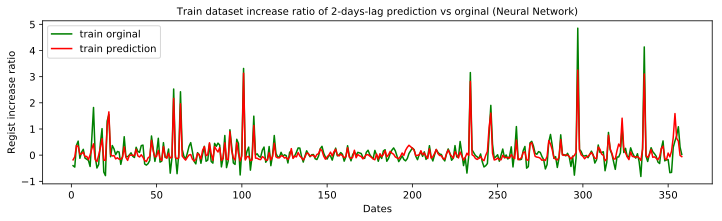

In [821]:
result_train = pd.DataFrame({'train_Y':train_Y, \
              'pred_train_Y':train_Y_prediction.flatten()
             })
time = [x + 1 for x in range(0, result_train.shape[0])]


# pd.DataFrame({'train_Y': train_Y,\
#               'pred_train_Y': train_Y_prediction.flatten()
#              })
plt.figure(figsize=(12,3))
plt.plot(time, result_train.train_Y, color='green', label='train orginal')
plt.plot(time, result_train.pred_train_Y, color='red', label='train prediction')
plt.ylabel('Regist increase ratio', fontsize = 10)
plt.xlabel('Dates', fontsize = 10)
plt.title('Train dataset increase ratio of 2-days-lag prediction vs orginal (Neural Network)', fontsize = 10)
plt.savefig('train_increase_ratio_origin_vs_prediction.pdf', bbox_inches='tight')
plt.legend(loc='upper left')
axes = plt.gca()
# axes.set_ylim([-1,5])
plt.show()

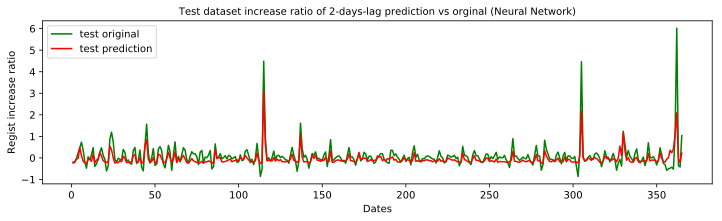

In [822]:
# test_Y_prediction.flatten()



result = pd.DataFrame({'test_Y':test_Y, \
              'pred_test_Y':test_Y_prediction.flatten()
             })

time = [x + 1 for x in range(0, result.shape[0])]


# pd.DataFrame({'train_Y': train_Y,\
#               'pred_train_Y': train_Y_prediction.flatten()
#              })
plt.figure(figsize=(12,3))
plt.plot(time, result.test_Y, color='green', label='test original')
plt.plot(time, result.pred_test_Y, color='red', label='test prediction')
# plt.plot(time, [0 for i in range(0, result.shape[0])], '--')
plt.ylabel('Regist increase ratio', fontsize = 10)
plt.xlabel('Dates', fontsize = 10)
plt.legend(loc='upper left')
plt.title('Test dataset increase ratio of 2-days-lag prediction vs orginal (Neural Network)', fontsize = 10)
plt.savefig('test_increase_ratio_origin_vs_prediction.pdf', bbox_inches='tight')
axes = plt.gca()
# axes.set_ylim([-1,5])
plt.show()

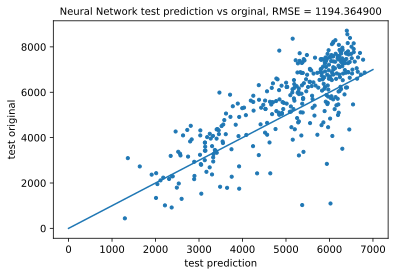

1194.3649003111532

In [823]:
# test['prediction_value']
# test['regist']
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

plt.figure()
ax = plt.scatter(test[predValueColumnName], test[target], s = 10)
plt.plot([x for x in range(0,7000)], [x for x in range(0, 7000)])
plt.ylabel('test original', fontsize = 10)
plt.xlabel('test prediction', fontsize = 10)
mse_NN = mean_squared_error(test[predValueColumnName], test[target])
mse = mse_NN**(0.5)
plt.title('Neural Network test prediction vs orginal, RMSE = %f'%mse, fontsize = 10)

plt.savefig('test_origin_vs_prediction.pdf', bbox_inches='tight')

plt.show()
mse_NN**(0.5)

In [864]:
revenuePerBike = 3
loanCostPerBike = 2
profit = pd.DataFrame({predValueColumnName:test[predValueColumnName], \
              target:test[target]
             })
profit['revenue_daily'] = profit.apply(lambda x: revenuePerBike * min(x[target], x[predValueColumnName]), axis = 1)
profit['cost_daily'] = profit.apply(lambda x:x[predValueColumnName] * loanCostPerBike, axis = 1)
profit['profit_daily'] = profit.revenue_daily - profit.cost_daily
profit['test_lag2'] = test[lagColumnName]
profit['benchmark_profit'] = profit.apply(
    lambda x: (min(x['test_lag2'], x[target]) * revenuePerBike - loanCostPerBike * x['test_lag2']),
    axis = 1
) 
totalProfit = profit.profit_daily.sum()

profit.to_csv("./nn_profit_regist.csv", index=False)
totalProfit
# profit.benchmark_profit.sum()


1610006.9329035282

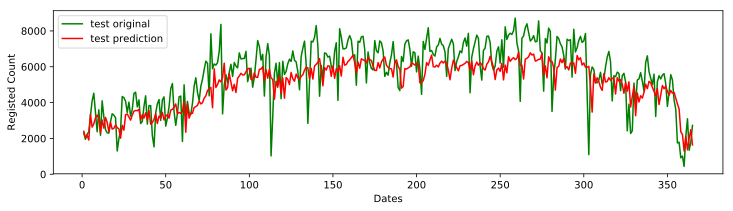

In [865]:
time = [x + 1 for x in range(0, result.shape[0])]
plt.figure(figsize=(12,3))
plt.plot(time, profit[target], color='green', label='test original')
plt.plot(time, profit[predValueColumnName], color='red', label='test prediction')
# plt.plot(time, [0 for i in range(0, result.shape[0])], '--')
plt.ylabel('Registed Count', fontsize = 10)
plt.xlabel('Dates', fontsize = 10)
plt.legend(loc='upper left')
axes = plt.gca()
# axes.set_ylim([-1,5])
plt.savefig('test_origin_vs_prediction_timeline.pdf', bbox_inches='tight')
plt.show()

In [697]:
def restoreRatio2Result(pred, raw_lag):
    return (pred + 1) * raw_lag

def constructResultDf(raw_data, raw_lag, pred, target, timeline):
    revenue = 3
    loan = 2
    result = pd.DataFrame({'date': timeline, 
                           'raw_Y': raw_data,
                           'raw_lag': raw_lag,
                           'target_Y_ratio': target,
                           'pred_Y_ratio': pred,
                           'pred_Y': restoreRatio2Result(pred, raw_lag)}
                         )
    result['cost'] = result.apply(
        lambda x:x['pred_Y'] * loan, axis = 1
    )
    result['revenue'] = result.apply(
        lambda x:revenue * min(x['pred_Y'], x['raw_Y']), axis = 1
    )
    result['profit'] = result['revenue'] - result['cost']
    result['benchmark_profit'] = result.apply(
        lambda x: (min(x['raw_lag'], x['raw_Y']) * revenue - loan * x['raw_lag']),
        axis = 1
    )
    return result

def plotGraph(x, *ys, xaxis = 'x', yaxis = 'y', title = 'Figure', long = True):
    colors = ['green', 'red', 'yellow', 'blue', 'purple']
    if long:
        plt.figure(figsize=(12,3))
    else: 
        plt.figure()
    for i in range(len(ys)):
        if i == 0:
            plt.plot(x, ys[i], c = 'green', label = 'orginial')
        else:
            plt.plot(x, ys[i], c= colors[i])
#     plt.plot(x, ys[1], color='green', label='test original')
#     plt.plot(time, test['xgb'], color='red', label='test prediction')
    plt.ylabel(yaxis, fontsize = 10)
    plt.xlabel(xaxis, fontsize = 10)
    plt.legend(loc='upper left')
    plt.title(title)
#     axes = plt.gca()
#     axes.set_ylim([-1,5])
    plt.savefig('%s.pdf'%title, bbox_inches='tight')
    plt.show()

### Single model -- XGBoost, tunning the parameters

In [698]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [742]:
xgbModel = xgboost.XGBRegressor(n_estimators=100, 
                           learning_rate=0.09, 
                           gamma=0.1,
                           subsample=0.6,
                           colsample_bytree=0.8, 
                           max_depth=7,
                           alpha=1,
                           reg_lambda = 9
                          )
xgbModel.fit(train_X,train_Y)

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.09,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=9, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

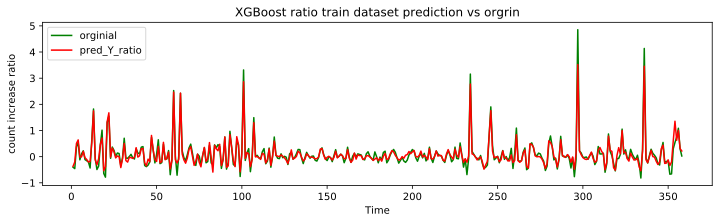

In [743]:
train_pred = xgbModel.predict(train_X)
res_train = constructResultDf(train.cnt[7:], train.cnt_lag2[7:], train_pred, train_Y, train.dteday[7:])
time = [x + 1 for x in range(0, train_pred.shape[0])]
plotGraph(time, res_train.target_Y_ratio, res_train.pred_Y_ratio, xaxis = 'Time', yaxis = 'count increase ratio',
         title = 'XGBoost ratio train dataset prediction vs orgrin', long = True)


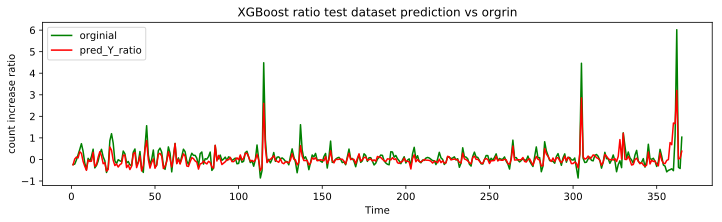

In [744]:
predictions = xgbModel.predict(test_X)
res = constructResultDf(test.cnt, test.cnt_lag2, predictions, test_Y, test.dteday)
time = [x + 1 for x in range(0, predictions.shape[0])]
plotGraph(time, res.target_Y_ratio, res.pred_Y_ratio, xaxis = 'Time', yaxis = 'count increase ratio',
         title = 'XGBoost ratio test dataset prediction vs orgrin', long = True)

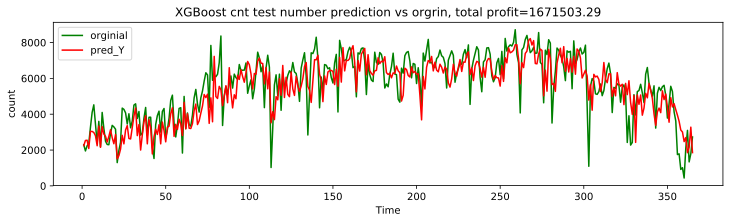

In [745]:
plotGraph(time, res.raw_Y, res.pred_Y, xaxis = 'Time', yaxis = 'count',
         title = 'XGBoost cnt test number prediction vs orgrin, total profit=%s'%round(res.profit.sum(),2), long = True)




In [863]:
res

,date,pred_Y,pred_Y_ratio,raw_Y,raw_lag,target_Y_ratio,cost,revenue,profit,benchmark_profit
365,2012-01-01,2430.618509,-0.189524,2294,2999.0,-0.235,4861.237018,6882.000000,2020.762982,884.0
366,2012-01-02,2500.137743,0.006092,1951,2485.0,-0.215,5000.275485,5853.000000,852.724515,883.0
367,2012-01-03,2398.106860,0.045382,2236,2294.0,-0.025,4796.213720,6708.000000,1911.786280,2120.0
368,2012-01-04,2286.553901,0.171991,2368,1951.0,0.214,4573.107801,6859.661702,2286.553901,1951.0
369,2012-01-05,2940.969053,0.315281,3272,2236.0,0.463,5881.938105,8822.907158,2940.969053,2236.0
370,2012-01-06,3103.608440,0.310645,4098,2368.0,0.731,6207.216881,9310.825321,3103.608440,2368.0
371,2012-01-07,3216.974334,-0.016817,4521,3272.0,0.382,6433.948669,9650.923003,3216.974334,3272.0
372,2012-01-08,3070.884802,-0.250638,3425,4098.0,-0.164,6141.769603,9212.654405,3070.884802,2079.0
373,2012-01-09,2499.199412,-0.447202,2376,4521.0,-0.474,4998.398823,7128.000000,2129.601177,-1914.0
374,2012-01-10,3719.970833,0.086123,3598,3425.0,0.051,7439.941666,10794.000000,3354.058334,3425.0


Text(0.5,1,'Neural Network test prediction vs orginal, RMSE = 966.151319')

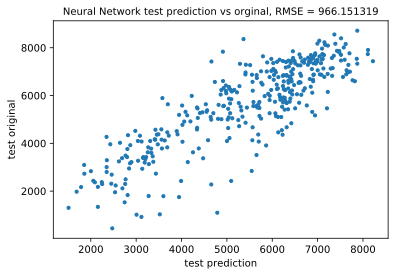

In [746]:
plt.figure()
ax = plt.scatter(res.pred_Y, res.raw_Y, s = 10)
plt.ylabel('test original', fontsize = 10)
plt.xlabel('test prediction', fontsize = 10)
mse_NN = mean_squared_error(res.raw_Y, res.pred_Y)
mse = mse_NN**(0.5)
plt.title('Neural Network test prediction vs orginal, RMSE = %f'%mse, fontsize = 10)


In [747]:
from keras.models import load_model
nnModel.save('nn_model.h5')
xgbModel

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.09,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=9, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

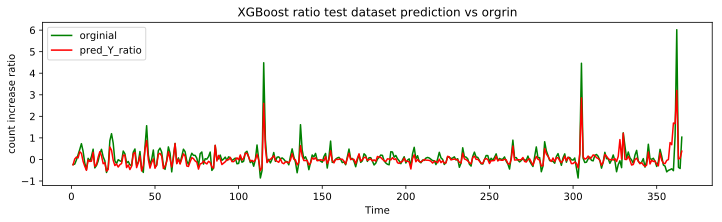

In [748]:
predictions_xgboost = xgbModel.predict(test_X)
res = constructResultDf(test.cnt, test.cnt_lag2, predictions_xgboost, test_Y, test.dteday)
time = [x + 1 for x in range(0, predictions.shape[0])]
plotGraph(time, res.target_Y_ratio, res.pred_Y_ratio, xaxis = 'Time', yaxis = 'count increase ratio',
         title = 'XGBoost ratio test dataset prediction vs orgrin', long = True)

In [749]:
xgboost_num = res.pred_Y

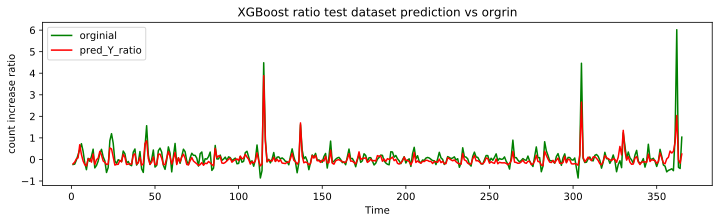

In [750]:

predictions_nn = nnModel.predict(test_X)
predictions_nn = predictions_nn.flatten()
res = constructResultDf(test.cnt, test.cnt_lag2, predictions_nn, test_Y, test.dteday)
time = [x + 1 for x in range(0, predictions.shape[0])]
plotGraph(time, res.target_Y_ratio, res.pred_Y_ratio, xaxis = 'Time', yaxis = 'count increase ratio',
         title = 'XGBoost ratio test dataset prediction vs orgrin', long = True)


#### SVR

In [861]:
from sklearn.grid_search import GridSearchCV    
from sklearn.svm import SVR    
model = SVR(kernel='rbf')    
param_grid = {'C': [j * 0.01 + 0.01 for j in range(200)], 'gamma': [i * 0.001 for i in range(1000)]}    
grid_search = GridSearchCV(model, param_grid, n_jobs = 5, verbose=1)    
grid_search.fit(train_X, train_Y)    
best_parameters = grid_search.best_estimator_.get_params()    
for para, val in list(best_parameters.items()):    
    print(para, val)    
svrModel = SVR(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'])    
svrModel.fit(train_X, train_Y) 
# best_parameters['C']

Fitting 3 folds for each of 200000 candidates, totalling 600000 fits


[Parallel(n_jobs=5)]: Done 490 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 3490 tasks      | elapsed:    7.4s
[Parallel(n_jobs=5)]: Done 8490 tasks      | elapsed:   17.6s
[Parallel(n_jobs=5)]: Done 15490 tasks      | elapsed:   31.7s
[Parallel(n_jobs=5)]: Done 24490 tasks      | elapsed:   51.7s
[Parallel(n_jobs=5)]: Done 35490 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 48490 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done 68446 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Done 109246 tasks      | elapsed:  3.9min
[Parallel(n_jobs=5)]: Done 149062 tasks      | elapsed:  5.6min
[Parallel(n_jobs=5)]: Done 174262 tasks      | elapsed:  6.9min
[Parallel(n_jobs=5)]: Done 201862 tasks      | elapsed:  8.3min
[Parallel(n_jobs=5)]: Done 231862 tasks      | elapsed:  9.8min
[Parallel(n_jobs=5)]: Done 264262 tasks      | elapsed: 11.3min
[Parallel(n_jobs=5)]: Done 299062 tasks      | elapsed: 12.9min
Process ForkPoolWorker-232:
Traceback (most recent c

KeyboardInterrupt: 

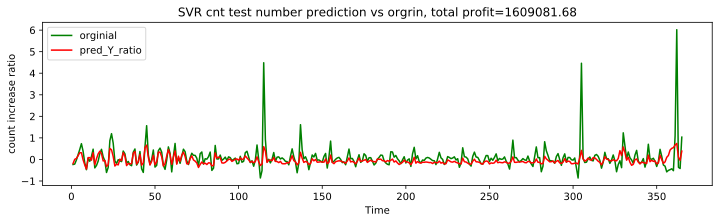

In [859]:
svrPred = svrModel.predict(test_X)
res = constructResultDf(test.cnt, test.cnt_lag2, svrPred, test_Y, test.dteday)
time = [x + 1 for x in range(0, predictions.shape[0])]
plotGraph(time, res.target_Y_ratio, res.pred_Y_ratio, xaxis = 'Time', yaxis = 'count increase ratio',
         title = 'SVR cnt test number prediction vs orgrin, total profit=%s'%round(res.profit.sum(),2), long = True)


# lightGBM

In [830]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor(objective='regression',
                        num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=20)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)


OSError: dlopen(/usr/local/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/gcc/lib/gcc/8/libgomp.1.dylib
  Referenced from: /usr/local/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [828]:
svr_num = res.pred_Y

In [812]:
percent = [0.1 * i for i in range(0, 10)]

In [826]:
rr = {}
for per in percent:
    revenue = 3
    loan = 2
    avg = per * xgboost_num + (1-per) *nn_num
    result = pd.DataFrame({'avg': avg, 'cnt': test.cnt})  
    result['prof'] = result.apply(
        lambda x: (min(x['avg'], x['cnt']) * revenue - loan * x['avg']),
        axis = 1
    )
    rr[per] = result.prof.sum()

In [827]:
max(rr, key=rr.get)
(max(rr, key=rr.get), rr.get(max(rr, key=rr.get)))

(0.9, 1677449.9321385622)

## stack ensemble